In [66]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
m= gp.Model('Power Tarrif')

Academic license - for non-commercial use only - expires 2021-07-21
Using license file C:\Users\Satish\gurobi.lic


In [3]:
X = m.addVars(3,5,vtype='i',lb=0) # No of Units of ith type is running in t time period

In [4]:
L = m.addVars(3,5,vtype='i',lb=0) # Load of ith type units at time period t

In [5]:
S = m.addVars(3,5,vtype='i',lb=0) # No of units ith type units started at time period t

In [6]:
Load_max=[2000,1750,4000]
Load_min=[850,1250,1500]

In [7]:
m.addConstrs((L[i,t] <= (Load_max[i] * X[i,t]) for i in range(3) for t in range(5)))
#Maximum Load constraint for ith type of unit in t th time period.

{(0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 0): <gurobi.Constr *Awaiting Model Update*>,
 (1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (2, 0): <gurobi.Constr *Awaiting Model Update*>,
 (2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 4): <gurobi.Constr *Awaiting Model Update*>}

In [8]:
m.addConstrs((L[i,t] >= (Load_min[i] * X[i,t]) for i in range(3) for t in range(5)))
#Minimum Load constraint for ith type of unit in t th time period.

{(0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 0): <gurobi.Constr *Awaiting Model Update*>,
 (1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (2, 0): <gurobi.Constr *Awaiting Model Update*>,
 (2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 4): <gurobi.Constr *Awaiting Model Update*>}

In [9]:
No_of_units=[12,10,5]

In [10]:
m.addConstrs((X[i,t] <= (No_of_units[i]) for i in range(3) for t in range(5)))
#No of units of ith type.

{(0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 0): <gurobi.Constr *Awaiting Model Update*>,
 (1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (2, 0): <gurobi.Constr *Awaiting Model Update*>,
 (2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 4): <gurobi.Constr *Awaiting Model Update*>}

In [11]:
Req_time = [15000,30000,25000,40000,27000]

In [12]:
m.addConstrs(gp.quicksum(L[i,t] for i in range(3)) >= 1.15*Req_time[t] for t in range(5))

# 15% additional margin constraints on total available power

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>}

In [13]:
m.addConstrs(S[i,t] >= (X[i,t] - X[i,t-1]) for i in range(3) for t in range(1,5))

{(0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 4): <gurobi.Constr *Awaiting Model Update*>}

In [14]:
m.addConstrs(S[i,0] >= (X[i,0] - X[i,5-1]) for i in range(3))

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>}

In [15]:
hr_time = [6,3,6,3,6]

In [16]:
Min_cost = [1000,2600,3000]

In [17]:
Abv_min_cost=[2,1.3,3]

In [18]:
Startup_cost=[2000,1000,50]

In [19]:
m.setObjective(
    gp.quicksum((X[i,t]*Min_cost[i]*hr_time[t]) + (L[i,t]-(Load_min[i]*X[i,t]))*Abv_min_cost[i]*hr_time[t] +(S[i,t]*Startup_cost[i]*hr_time[t]) for i in range(3) for t in range(5))
)

In [20]:
m.ModelSense=GRB.MINIMIZE                   #set optimization to maximize
m.update()
m.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 65 rows, 45 columns and 135 nonzeros
Model fingerprint: 0x1a40aea6
Variable types: 0 continuous, 45 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+03]
  Objective range  [4e+00, 1e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 5e+04]
Presolve removed 15 rows and 0 columns
Presolve time: 0.01s
Presolved: 50 rows, 45 columns, 120 nonzeros
Variable types: 0 continuous, 45 integer (0 binary)
Found heuristic solution: objective 1432182.0000
Found heuristic solution: objective 1257900.0000

Root relaxation: objective 1.173321e+06, 24 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1173321.43    0    6 1257900.00 1173321.43  6.72%     -    0s
H    0     0    

In [113]:
Sol_X=np.zeros((5,3))
for i in range(3):
    for j in range(5):
        Sol_X[j,i]=X[i,j].x


In [114]:
Sol_L=np.zeros((5,3))
for i in range(3):
    for j in range(5):
        Sol_L[j,i]=L[i,j].x


In [115]:
Sol_S=np.zeros((5,3))
for i in range(3):
    for j in range(5):
        Sol_S[j,i]=S[i,j].x


In [133]:
Unit_operational = pd.DataFrame(data=Sol_X, index=['12pm to 6am', ' 6am to 9am', '9am to 3pm', '3pm to 6pm', '6pm to 12pm'], columns=[1,2,3])

In [134]:
Operating_Load = pd.DataFrame(data=Sol_L, index=['12pm to 6am', ' 6am to 9am', '9am to 3pm', '3pm to 6pm', '6pm to 12pm'], columns=[1,2,3])

So here is the no of units operational per section of time. We see that the unit with lower startup cost are turn off and on more frequent.

In [135]:
Unit_operational

,1,2,3
12pm to 6am,12.0,4.0,0.0
6am to 9am,12.0,10.0,0.0
9am to 3pm,12.0,10.0,0.0
3pm to 6pm,12.0,10.0,3.0
6pm to 12pm,12.0,10.0,0.0


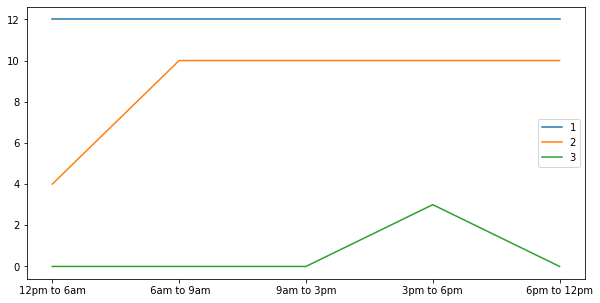

In [137]:
plt.figure(figsize=(10,5))
plt.plot(Unit_operational)
plt.legend(Unit_operational.columns)

Here is the operating load of each type of unit fleet. As type 3 has the lowest startup cost it is turn be intermittant use.

In [138]:
Operating_Load

,1,2,3
12pm to 6am,10250.0,7000.0,-0.0
6am to 9am,17000.0,17500.0,0.0
9am to 3pm,11250.0,17500.0,0.0
3pm to 6pm,24000.0,17500.0,4500.0
6pm to 12pm,13550.0,17500.0,-0.0


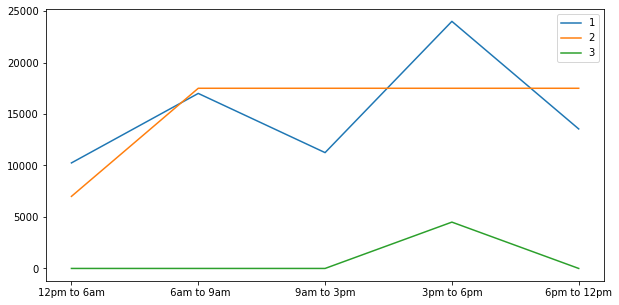

In [139]:
plt.figure(figsize=(10,5))
plt.plot(Operating_Load)
plt.legend(Operating_Load.columns)

In [142]:
Startups = pd.DataFrame(data=Sol_S, index=['12pm to 6am', ' 6am to 9am', '9am to 3pm', '3pm to 6pm', '6pm to 12pm'], columns=[1,2,3])

This shows the total no of unit startup in each section of time block.

In [143]:
Startups

,1,2,3
12pm to 6am,-0.0,-0.0,-0.0
6am to 9am,-0.0,6.0,0.0
9am to 3pm,-0.0,-0.0,-0.0
3pm to 6pm,-0.0,-0.0,3.0
6pm to 12pm,-0.0,-0.0,-0.0


In [174]:
Cost=np.zeros(5)
Tarrif=np.zeros(5)
for x in range(3):
    for y in range(5):
        Cost[y]=Tarrif[y]+max((Operating_Load.iloc[y,x]-Load_min[x]),0)*Abv_min_cost[x] + Min_cost[x] + Startup_cost[x]/hr_time[y]
        Tarrif[y]=Cost[y]/Req_time[y]

In [175]:
Tarrif

array([0.20060108, 0.10058229, 0.12037156, 0.3004317 , 0.11145253])

In [176]:
Cost

array([ 3009.01620059,  3017.46864885,  3009.28903541, 12017.26815498,
        3009.21824655])

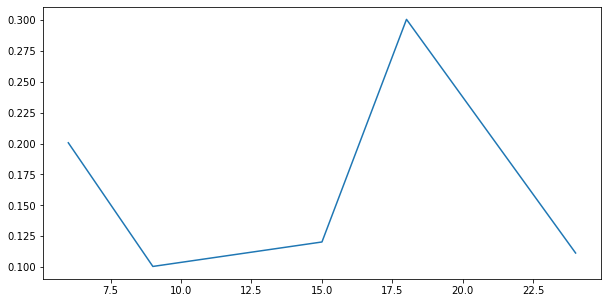

In [181]:
plt.figure(figsize=(10,5))
plt.plot([6,9,15,18,24],Tarrif)

Shows the cost per hour over 24 hrs.

Text(0, 0.5, 'Power Req')

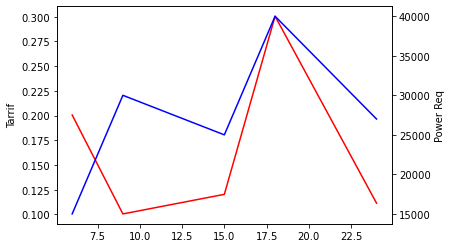

In [200]:
fig,ax = plt.subplots()
ax.plot([6,9,15,18,24],Tarrif,color='red')
ax.set_ylabel('Tarrif')
ax2=ax.twinx()
ax2.plot([6,9,15,18,24],Req_time,color='blue')
ax2.set_ylabel('Power Req')

Shows the tarrif cost vs power requirement. We observe the majority of tarrif increase is due to the startup costs.